In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Считываем данные по ежегодному обороту розничной торговли:
data_an = pd.read_excel('retail_data_annually.xlsx')
data_an.head()

,Year,Retail_turnover
0,1970,78.8
1,1971,84.2
2,1972,89.6
3,1973,94.0
4,1974,99.2


In [6]:
data_an.set_index('Year', inplace=True)

Text(0.5, 1.0, 'Оборот розничной торговли, млн. руб.')

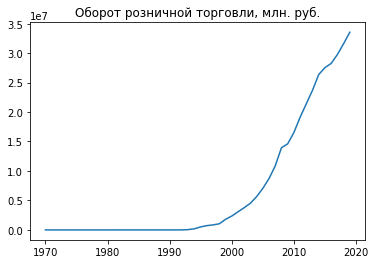

In [7]:
plt.plot(data_an)
plt.title('Оборот розничной торговли, млн. руб.')

In [9]:
# Сужаем временной период:
data_an = data_an[data_an.index > 2005]

In [10]:
# Для наглядности преобразуем млн. в трлн.:
data_an = data_an / 1_000_000

Text(0.5, 1.0, 'Оборот розничной торговли, трлн. руб.')

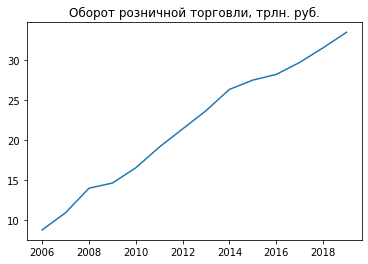

In [11]:
plt.plot(data_an)
plt.title('Оборот розничной торговли, трлн. руб.')

In [13]:
# Считываем данные по ежеквартальному обороту розничной торговли:
data_q = pd.read_excel('retail_data_quarterly.xlsx')
data_q.head()

,Year,Period,Retail_turnover
0,2000,январь-март,517743.2
1,2000,II квартал,542772.6
2,2000,III квартал,598360.1
3,2000,IV квартал,693398.5
4,2001,январь-март,665222.7


In [14]:
# Преобразуем 2 столбца, содержащие числовое обозначение года
# и текстовое обозначение квартала, в объект datetime:
quarters = {'январь-март': '-03-31', 'II квартал': '-06-30',
            'III квартал': '-09-30', 'IV квартал': '-12-31'}

data_q['Period'] = data_q['Period'].replace(quarters)
data_q['Date'] = pd.to_datetime(data_q.Year.astype(str) + data_q.Period)
data_q.head()

,Year,Period,Retail_turnover,Date
0,2000,-03-31,517743.2,2000-03-31
1,2000,-06-30,542772.6,2000-06-30
2,2000,-09-30,598360.1,2000-09-30
3,2000,-12-31,693398.5,2000-12-31
4,2001,-03-31,665222.7,2001-03-31


In [15]:
# Убираем лишние столбцы и преобразуем столбец с датами в индекс:
data_q.drop(['Year', 'Period'], axis='columns', inplace=True)
data_q.set_index('Date', inplace=True)

In [16]:
# Преобразуем частоту индекса 'freq' из None в ежеквартальную:
data_q.index = pd.date_range(start=data_q.index[0], periods=len(data_q), freq='Q')

Text(0.5, 1.0, 'Оборот розничной торговли, млн. руб.')

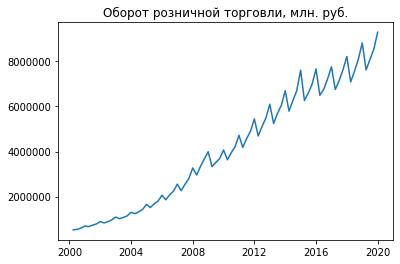

In [17]:
plt.plot(data_q)
plt.title('Оборот розничной торговли, млн. руб.')

In [18]:
# Сужаем временной период:
data_q = data_q[data_q.index > pd.to_datetime('2014-03-31')]

In [19]:
# Для большей наглядности преобразуем млн. в млрд.:
data_q = data_q / 1_000

Text(0.5, 1.0, 'Оборот розничной торговли, млрд. руб.')

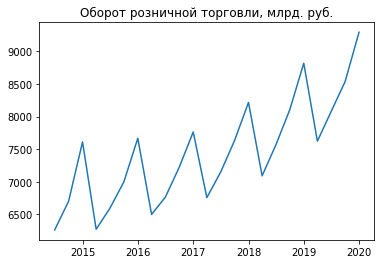

In [20]:
plt.plot(data_q)
plt.title('Оборот розничной торговли, млрд. руб.')

In [21]:
# Считываем данные по ежемесячному обороту розничной торговли:
data_m = pd.read_excel('retail_data_monthly.xlsx')
data_m.head()

,Year,Month,Retail_turnover
0,2000,январь,170269.4
1,2000,февраль,168131.7
2,2000,март,179342.1
3,2000,апрель,177760.6
4,2000,май,179779.6


In [23]:
# Преобразуем 2 столбца, содержащие числовое обозначение года
# и текстовое обозначение месяца, в объект datetime:
months = {'январь': '-01-31', 'февраль': '-02-28', 'март': '-03-31',
          'апрель': '-04-30', 'май': '-05-31', 'июнь': '-06-30',
          'июль': '-07-31', 'август': '-08-31', 'сентябрь': '-09-30',
          'октябрь': '-10-31', 'ноябрь': '-11-30', 'декабрь': '-12-31'}

data_m['Month'] = data_m['Month'].replace(months)
data_m['Date'] = pd.to_datetime(data_m.Year.astype(str) + data_m.Month)
data_m.head()

,Year,Month,Retail_turnover,Date
0,2000,-01-31,170269.4,2000-01-31
1,2000,-02-28,168131.7,2000-02-28
2,2000,-03-31,179342.1,2000-03-31
3,2000,-04-30,177760.6,2000-04-30
4,2000,-05-31,179779.6,2000-05-31


In [24]:
# Убираем лишние столбцы и преобразуем столбец с датами в индекс:
data_m.drop(['Year', 'Month'], axis='columns', inplace=True)
data_m.set_index('Date', inplace=True)

In [25]:
# Преобразуем частоту индекса 'freq' из None в ежемесячную:
data_m.index = pd.date_range(start=data_m.index[0], periods=len(data_m), freq='M')

Text(0.5, 1.0, 'Оборот розничной торговли, млн. руб.')

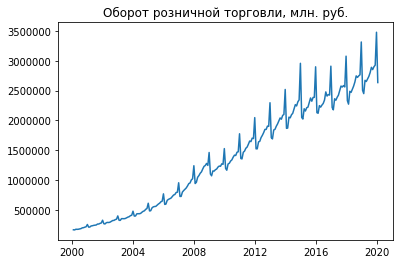

In [26]:
plt.plot(data_m)
plt.title('Оборот розничной торговли, млн. руб.')

In [27]:
# Сужаем временной период:
data_m = data_m[data_m.index > pd.to_datetime('2014-03-31')]

In [28]:
# Для наглядности преобразуем млн. в млрд.:
data_m = data_m / 1_000

Text(0.5, 1.0, 'Оборот розничной торговли, млрд. руб.')

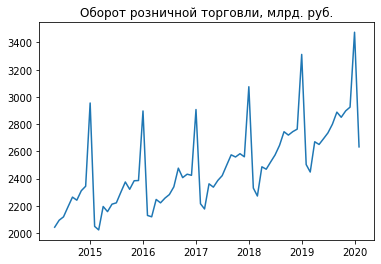

In [29]:
plt.plot(data_m)
plt.title('Оборот розничной торговли, млрд. руб.')

In [30]:
# Декомпозиция данных и визуализация компонентов:
decomposition = seasonal_decompose(data_m)

observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

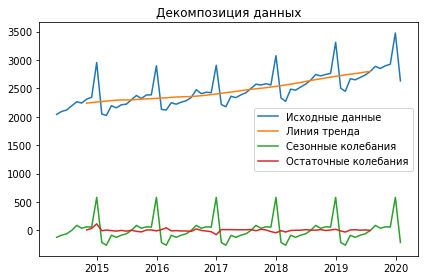

In [31]:
plt.plot(data_m.index, observed, label='Исходные данные')
plt.plot(data_m.index, trend, label='Линия тренда')
plt.plot(data_m.index, seasonal, label='Сезонные колебания')
plt.plot(data_m.index, residual, label='Остаточные колебания')
plt.legend()
plt.title('Декомпозиция данных')
plt.tight_layout()

Text(0.5, 1.0, 'ACF')

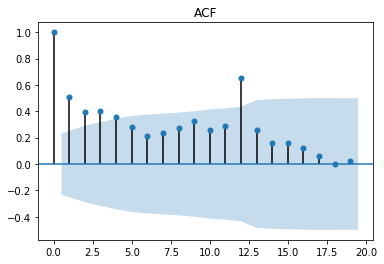

In [32]:
# Графики автокорреляции:
plot_acf(data_m)
plt.title('ACF')

Text(0.5, 1.0, 'PACF')

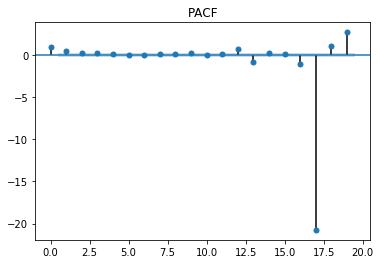

In [33]:
plot_pacf(data_m)
plt.title('PACF')

In [34]:
# Создаем модель ARIMA:
model_arima = ARIMA(data_m, order=(0, 1, 1))
decomposition = model_arima.fit(disp=False)
decomposition.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Retail_turnover   No. Observations:                   69
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -469.992
Method:                       css-mle   S.D. of innovations            213.100
Date:                Tue, 25 Feb 2020   AIC                            945.985
Time:                        15:18:29   BIC                            952.687
Sample:                    05-31-2014   HQIC                           948.644
                         - 01-31-2020                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      10.3869      1.261      8.240      0.000       7.916      12.858
ma.L1.D.Retail_turnover    -1.0000      0.055    -18.259      0.000      -1.107      -0.893
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Text(0, 0.5, 'Retail, bln Rubles')

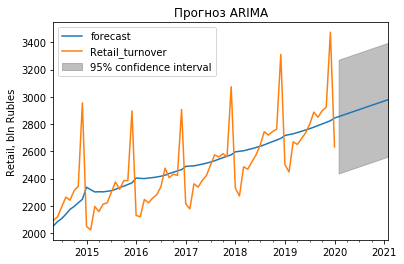

In [35]:
# График прогноза на 12 месяцев с доверительным интервалом:
decomposition.plot_predict(1, len(data_m) + 12)
plt.title('Прогноз ARIMA')
plt.ylabel('Retail, bln Rubles')

In [36]:
forecast = decomposition.forecast(steps=12)

In [37]:
print('\nМин. и макс. значения прогноза ARIMA (млрд. руб.):\n',
      pd.DataFrame(forecast[2], columns=['Min', 'Max'],
                   index=pd.date_range('2020-02-29', periods=12, freq='M')))


Мин. и макс. значения прогноза ARIMA (млрд. руб.):
                     Min          Max
2020-02-29  2437.114342  3272.449737
2020-03-31  2447.501207  3282.836602
2020-04-30  2457.888072  3293.223468
2020-05-31  2468.274937  3303.610333
2020-06-30  2478.661803  3313.997198
2020-07-31  2489.048668  3324.384064
2020-08-31  2499.435533  3334.770929
2020-09-30  2509.822398  3345.157794
2020-10-31  2520.209264  3355.544659
2020-11-30  2530.596129  3365.931525
2020-12-31  2540.982994  3376.318390
2021-01-31  2551.369860  3386.705255


In [38]:
print('\nБазовый прогноз ARIMA (млрд. руб.):\n', pd.Series(forecast[0],
                    index=pd.date_range('2020-02-29', periods=12, freq='M')))


Базовый прогноз ARIMA (млрд. руб.):
 2020-02-29    2854.782039
2020-03-31    2865.168905
2020-04-30    2875.555770
2020-05-31    2885.942635
2020-06-30    2896.329500
2020-07-31    2906.716366
2020-08-31    2917.103231
2020-09-30    2927.490096
2020-10-31    2937.876962
2020-11-30    2948.263827
2020-12-31    2958.650692
2021-01-31    2969.037557
Freq: M, dtype: float64


In [39]:
# Создаем модель SARIMA:
model_sarima = SARIMAX(data_m,
                        order=(0, 1, 1),
                        seasonal_order=(0, 1, 1, 12))
decomposition2 = model_sarima.fit(disp=False)
decomposition2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                    Retail_turnover   No. Observations:                   70
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -278.916
Date:                            Tue, 25 Feb 2020   AIC                            563.832
Time:                                    15:20:18   BIC                            569.961
Sample:                                04-30-2014   HQIC                           566.214
                                     - 01-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4956      0.070     -7.033      0.000      -0.634      -0.357
ma.S.L12       0.2700      0.157      1.724      0.085      -0.037       0.577
sigma2      1018.2414    143.394      7.101      0.000     737.195    1299.288
===================================================================================
Ljung-Box (Q):                       27.52   Jarque-Bera (JB):                11.44
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.43
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

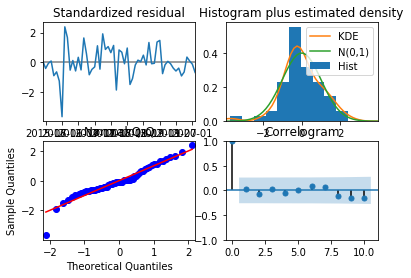

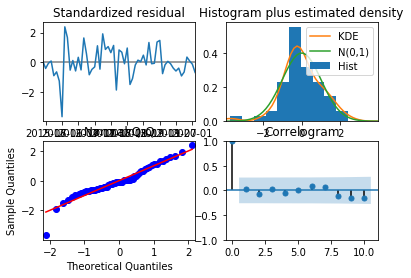

In [40]:
# Визуализируем параметры модели:
decomposition2.plot_diagnostics()

In [41]:
# Прогноз на 12 месяцев вперед:
prediction2 = decomposition2.get_forecast(steps=12)

In [42]:
# Доверительные интервалы прогноза:
prediction_int = prediction2.conf_int()

Text(0.5, 1.0, 'Прогноз SARIMA')

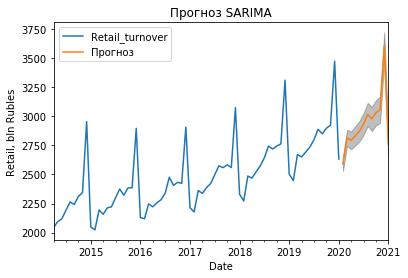

In [43]:
# Визуализируем прогноз:
ax = data_m.plot(label='Исходные данные')
prediction2.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(prediction_int.index,
                prediction_int.iloc[:, 0],
                prediction_int.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Retail, bln Rubles')
plt.legend()
plt.title('Прогноз SARIMA')

In [44]:
# Минимальные и максимальные значения прогноза:
print('\nМин. и макс. значения прогноза SARIMA (млрд. руб.):\n', prediction_int.round(2))


Мин. и макс. значения прогноза SARIMA (млрд. руб.):
             lower Retail_turnover  upper Retail_turnover
2020-02-29                2528.21                2653.29
2020-03-31                2744.16                2884.26
2020-04-30                2716.52                2870.18
2020-05-31                2749.75                2915.85
2020-06-30                2782.69                2960.37
2020-07-31                2840.08                3028.64
2020-08-31                2917.76                3116.60
2020-09-30                2873.36                3081.96
2020-10-31                2921.54                3139.48
2020-11-30                2943.72                3170.60
2020-12-31                3487.81                3723.31
2021-01-31                2636.60                2880.41


In [45]:
forecast2 = decomposition2.forecast(12)
print('\nБазовый прогноз SARIMA (млрд. руб.):\n', forecast2.round(2))


Базовый прогноз SARIMA (млрд. руб.):
 2020-02-29    2590.75
2020-03-31    2814.21
2020-04-30    2793.35
2020-05-31    2832.80
2020-06-30    2871.53
2020-07-31    2934.36
2020-08-31    3017.18
2020-09-30    2977.66
2020-10-31    3030.51
2020-11-30    3057.16
2020-12-31    3605.56
2021-01-31    2758.50
Freq: M, dtype: float64


Text(0, 0.5, 'Retail, bln Rubles')

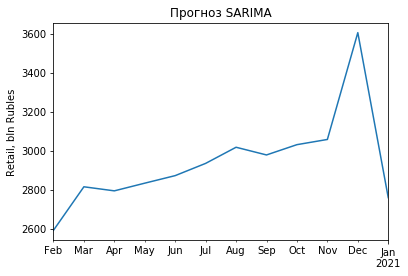

In [46]:
forecast2.plot()
plt.title('Прогноз SARIMA')
plt.ylabel('Retail, bln Rubles')

Прогноз модели SARIMA более точен, поскольку учитывает сезонные колебания оборота розничной торговли в пределах прогнозного периода.